In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import io
import matplotlib.pyplot as plt
import os
import sys
import h5py
import json

sys.path.append('/Users/rgao/Documents/Code/research/neurodsp/')
from neurodsp import spectral
import neurodsp as ndsp

In [2]:
# load info file
infofile = '/Users/rgao/Documents/Data/CRCNS/hc3/sess_info.json'

# get info file
with open(infofile) as data_file:    
    info = json.load(data_file)
    
datafolder = '/Users/rgao/Documents/Data/CRCNS/hc3/'

### visualize a channel SCV

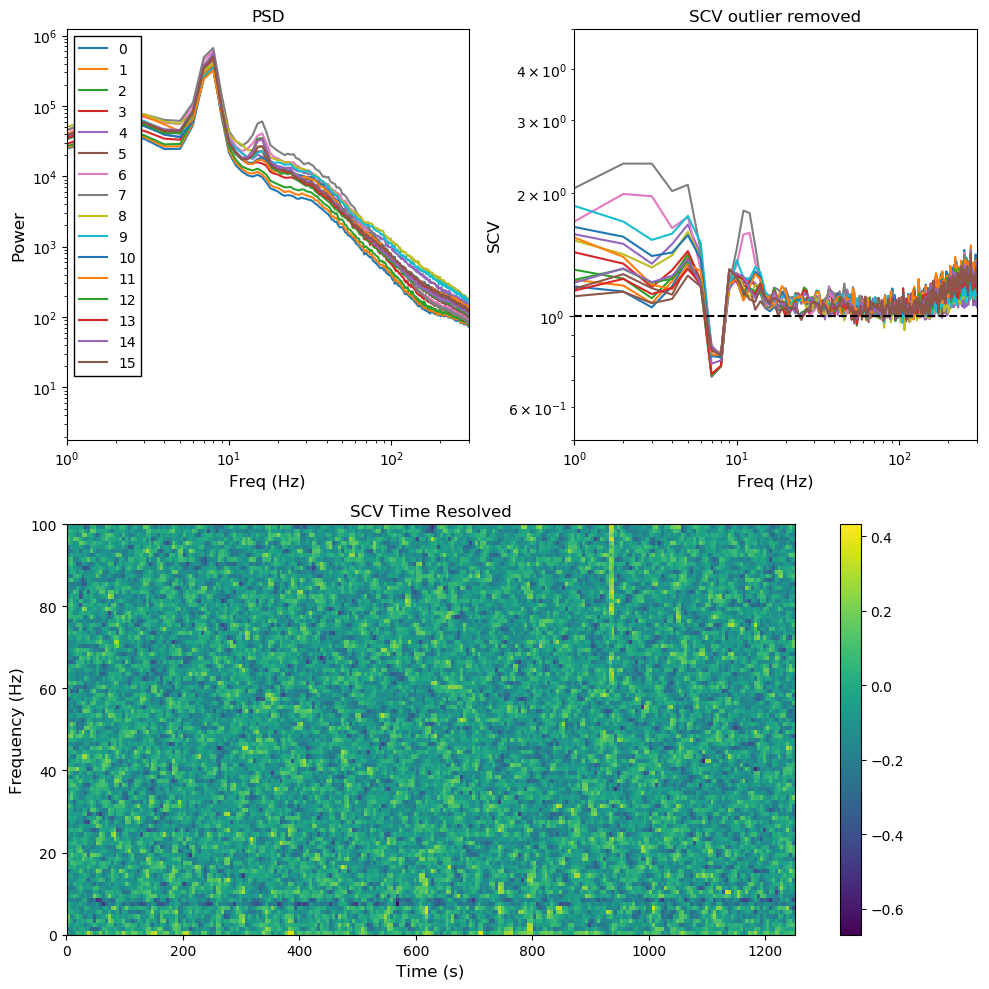

In [3]:
plt.style.use('paper')
sesh_id='12'
chan_id=8
data = io.loadmat(datafolder+'results/psdscv/'+ sesh_id +'_psdscv.mat', squeeze_me=True)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.loglog(data['freq'],data['psdm'].T);
plt.xlim([1, 300])
plt.xlabel('Freq (Hz)')
plt.ylabel('Power')
plt.title('PSD')
plt.legend(range(data['psdm'].shape[0]))

plt.subplot(2,2,2)
plt.loglog(data['freq'],data['scv1p'].T);
plt.loglog([1,500],[1,1], 'k--')
plt.xlim([1, 300])
plt.ylim([0.5, 5])
plt.xlabel('Freq (Hz)')
plt.ylabel('SCV')
plt.title('SCV outlier removed')

plt.subplot(2,1,2)
plt.imshow(np.log10(data['scv_tr'][chan_id,:,:]), 
           extent=[data['scv_T'][0],data['scv_T'][-1],data['freq'][-1],data['freq'][0]])
plt.ylim([0,100])
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('SCV Time Resolved')

plt.colorbar()
plt.tight_layout()

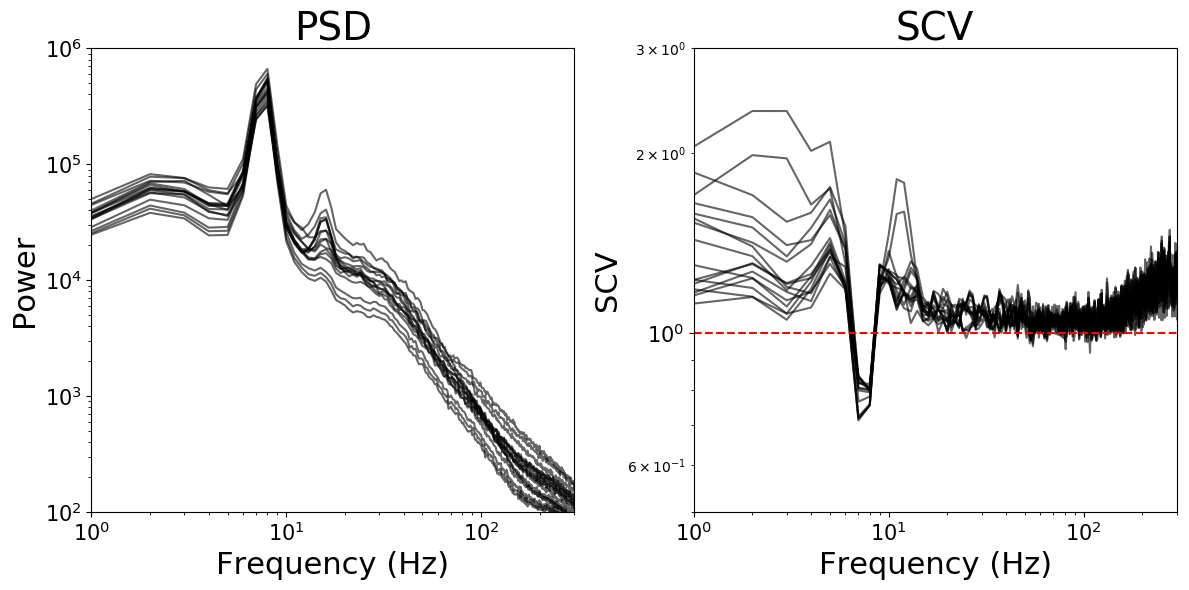

In [4]:
sesh_id='12'
chan_id=8
data = io.loadmat(datafolder+'results/psdscv/'+ sesh_id +'_psdscv.mat', squeeze_me=True)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.loglog(data['freq'],data['psdm'].T, 'k', alpha=0.6);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim([1, 300])
plt.ylim([1e2, 1e6])
plt.xlabel('Frequency (Hz)',fontsize=22)
plt.ylabel('Power',fontsize=22)
plt.title('PSD',fontsize=28)

plt.subplot(1,2,2)
plt.loglog(data['freq'],data['scv1p'].T, 'k', alpha=0.6);
plt.loglog([1,500],[1,1], '--r')
plt.xlim([1, 300])
plt.ylim([0.5, 3])
plt.xlabel('Frequency (Hz)',fontsize=22)
plt.ylabel('SCV',fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('SCV',fontsize=28)

plt.tight_layout()


# plt.plot([0,0], [0,150], 'k--', lw=2)
# plt.ylim([0, 140])
# plt.xlabel('Log10(SCV)', fontsize=22)
# plt.ylabel('Count', fontsize=22)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.title('Rat SCV All Channels', fontsize=28)

### compile all channels

In [5]:
num_rec = 27
scv_all = []
scv_mean = np.zeros((num_rec, 500))
for sesh in range(num_rec):
    print(str(sesh), end=',')
    data = io.loadmat(datafolder+'results/psdscv/'+ str(sesh) +'_psdscv.mat', squeeze_me=True)
    scv_all.append(data['scv1p'][:,:500].T)
    #scv_mean[sesh,:] = np.mean(np.log10(data['scv'][:,:500]),0)

scv_all = np.concatenate(scv_all, 1)
#scv_mean = np.concatenate(scv_mean,1)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,

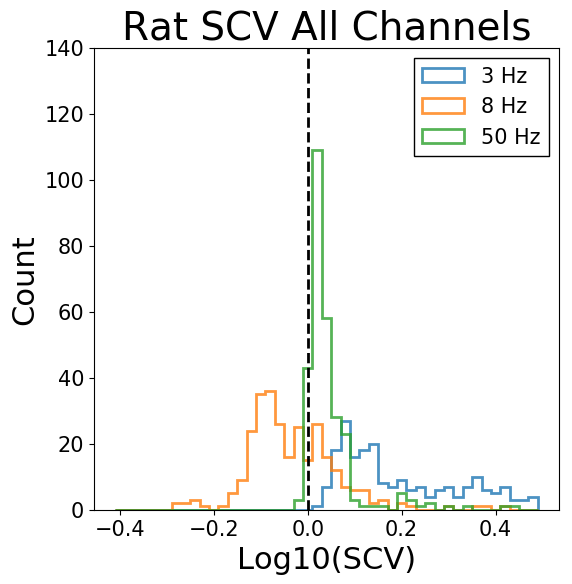

In [10]:
plt.figure(figsize=(6,6))
plt.hist(np.log10(scv_all[3,:]),bins=np.arange(-.41,.51,0.02),lw=2, histtype='step', alpha=0.8);
plt.hist(np.log10(scv_all[8,:]),bins=np.arange(-.41,.51,0.02),lw=2,histtype='step', alpha=0.8);
plt.hist(np.log10(scv_all[50,:]), bins=np.arange(-.41,.51,0.02),lw=2,histtype='step', alpha=0.8);
plt.legend(('3 Hz', '8 Hz', '50 Hz'), fontsize=15)
plt.plot([0,0], [0,150], 'k--', lw=2)
plt.ylim([0, 140])
plt.xlabel('Log10(SCV)', fontsize=22)
plt.ylabel('Count', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Rat SCV All Channels', fontsize=28)

In [41]:
# testing the different distributions
# test the logged values against 0
print(sp.stats.wilcoxon(np.log10(scv_all[3,:])))
print(sp.stats.wilcoxon(np.log10(scv_all[7,:])))
print(sp.stats.wilcoxon(np.log10(scv_all[50,:])))

# test the non-logged values against 1, which is the theoretical value for noise
print(sp.stats.wilcoxon(scv_all[3,:]-1.))
print(sp.stats.wilcoxon(scv_all[7,:]-1.))
print(sp.stats.wilcoxon(scv_all[50,:]-1.))

WilcoxonResult(statistic=0.0, pvalue=4.0001276240906105e-50)
WilcoxonResult(statistic=21034.0, pvalue=0.58724320358666304)
WilcoxonResult(statistic=336.0, pvalue=1.1989475698924204e-48)
WilcoxonResult(statistic=0.0, pvalue=4.0001276240906105e-50)
WilcoxonResult(statistic=19847.0, pvalue=0.17627470150343427)
WilcoxonResult(statistic=327.0, pvalue=1.0953196868907876e-48)


(0, 100)

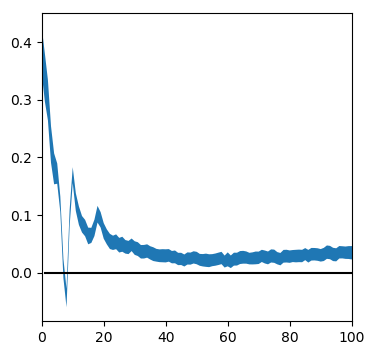

In [73]:
f_axis = np.arange(0,200)
mSCV = np.median(np.log10(scv_all[:200,:]),1)
sSCV = 2.*np.std(np.log10(scv_all[:200,:]),1)/np.sqrt(scv_all.shape[1])
#sSCV = np.std(np.log10(scv_all[:200,:]),1)

plt.fill_between(f_axis, mSCV-sSCV, mSCV+sSCV)
plt.plot([1, 100], [0,0], 'k')
plt.xlim([0, 100])

### analyzing example channel

In [ ]:
# datafile = '/Users/rgao/Documents/Data/CRCNS/hc3/ec013/ec013.426/0/lfp2.mat'
# infofile = '/Users/rgao/Documents/Data/CRCNS/hc3/sess_info.json'

# # get info file
# with open(infofile) as data_file:    
#     info = json.load(data_file)

# with h5py.File(datafile, 'r') as file:
#     data = np.array(file['lfp'][:,0])

In [ ]:
# fs = 1250.
# freq, psd = spectral.psd(data, fs, method='mean', nperseg=int(fs*2.), noverlap=int(fs))
# plt.loglog(freq, psd)
# freq, psd = spectral.psd(data, fs, method='median', nperseg=int(fs*2.), noverlap=int(fs))
# plt.loglog(freq, psd)
# freq, scv = spectral.scv(data,fs,nperseg=int(fs),outlierpct=1.)
# plt.loglog(freq, scv)
# plt.loglog([1.,500.],[1.,1.])

In [ ]:
# plt.figure(figsize=(10,5))
# freq, t, scv_rs = spectral.scv_rs(data,fs,method='rolling',rs_params=(10,5))
# plt.imshow(np.log10(scv_rs[:,:100]), aspect='auto', extent=(t[0], t[-1], freq[-1], freq[0]));

# freq,t,spg = sp.signal.spectrogram(data,fs=fs,nperseg=int(fs))
# #plt.imshow(np.log10(spg[:,:100]), aspect='auto', extent=(t[0], t[-1], freq[100], freq[0]));